In [1]:
import numpy
import pandas
import sqlite3
import os
from pandas.io import sql
from tables import *
import re
import pysam
import matplotlib
import matplotlib.image as mpimg
import seaborn
import matplotlib.pyplot
%matplotlib inline

In [2]:
def Model_cross_validation(List_of_ARFs):
    
    import scipy
    import keras
    import numpy as np
    import pandas as pd
    from keras import backend
    backend._BACKEND="theano"
    
    models = [None]*len(List_of_ARFs)
    seq_test_sets = [None]*len(List_of_ARFs)
    res_test_sets = [None]*len(List_of_ARFs)
    model_labels = [' ']*len(List_of_ARFs)
    test_set_labels = [' ']*len(List_of_ARFs)
    correlations = pd.DataFrame({'Percent variability explained by model':[0]*(len(List_of_ARFs)**2),'Model':[' ']*(len(List_of_ARFs)**2),'Data':[' ']*(len(List_of_ARFs)**2)})

    counter1=0
    
    for x in List_of_ARFs:
        models[counter1] = keras.models.load_model('/mnt/Data_DapSeq_Maize/TrainedModel_DanQ_' +x+'.h5')
        seq_test_sets[counter1]=np.load('/mnt/Data_DapSeq_Maize/'+x+'_seq_test.npy')
        res_test_sets[counter1]=np.load('/mnt/Data_DapSeq_Maize/'+x+'_res_test.npy')
        model_labels[counter1] = x+' Model'
        test_set_labels[counter1] = x+' Data'
        counter1=counter1+1
    
    counter2 = 0
    for counter2 in range(len(List_of_ARFs)):
        model = models[counter2]
        counter3=0
        for counter3 in range(len(List_of_ARFs)):
            temp = scipy.stats.pearsonr(res_test_sets[counter3],model.predict(seq_test_sets[counter3]).flatten())
            correlations['Percent variability explained by model'].iloc[(counter2*len(List_of_ARFs))+counter3] = (temp[0]**2)*100
            correlations['Model'].iloc[(counter2*len(List_of_ARFs))+counter3] = model_labels[counter2]
            correlations['Data'].iloc[(counter2*len(List_of_ARFs))+counter3] = test_set_labels[counter3]
            counter3 = counter3+1
        counter2 = counter2+1
    
    return correlations

In [3]:
def Plotting_heat_map_of_crossvalidation(correlations,save_fig_path):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn
    %matplotlib inline
    correlations_pivot = correlations.pivot('Model', 'Data', 'Percent variability explained by model')
    plot = seaborn.heatmap(correlations_pivot,cmap="YlGnBu", linewidths=.5)
    plt.savefig(save_fig_path)
    return correlations_pivot

In [6]:
# List_of_ARFs =['ARF4','ARF10','ARF13','ARF16','ARF18','ARF27','ARF29','ARF34','ARF35','ARF39']
# correlations = Model_cross_validation(List_of_ARFs)

#Repeating with the additional ARFS mary sent
List_of_ARFs =['ARF4','ARF7','ARF10','ARF13','ARF14','ARF16','ARF18','ARF24','ARF25','ARF27','ARF29','ARF34','ARF35','ARF36','ARF39']
correlations = Model_cross_validation(List_of_ARFs)


Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
# correlations.to_pickle('/mnt/Data_DapSeq_Maize/Correlations.pkl')
correlations.to_pickle('/mnt/Data_DapSeq_Maize/Correlations_170702.pkl')


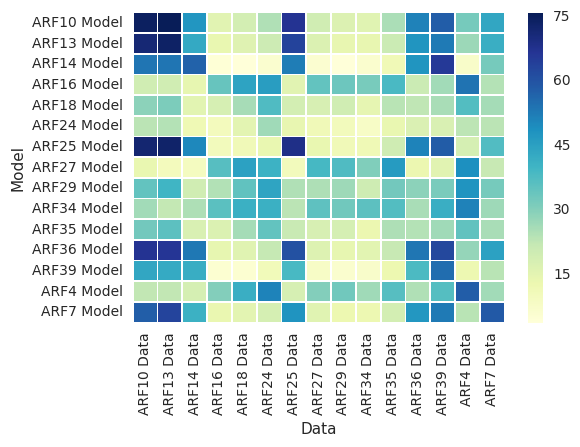

In [8]:
# correlations_pivot = Plotting_heat_map_of_crossvalidation(correlations,'/mnt/Data_DapSeq_Maize/Correlations_heat_map.svg')
correlations_pivot = Plotting_heat_map_of_crossvalidation(correlations,'/mnt/Data_DapSeq_Maize/Correlations_heat_map_170702.svg')


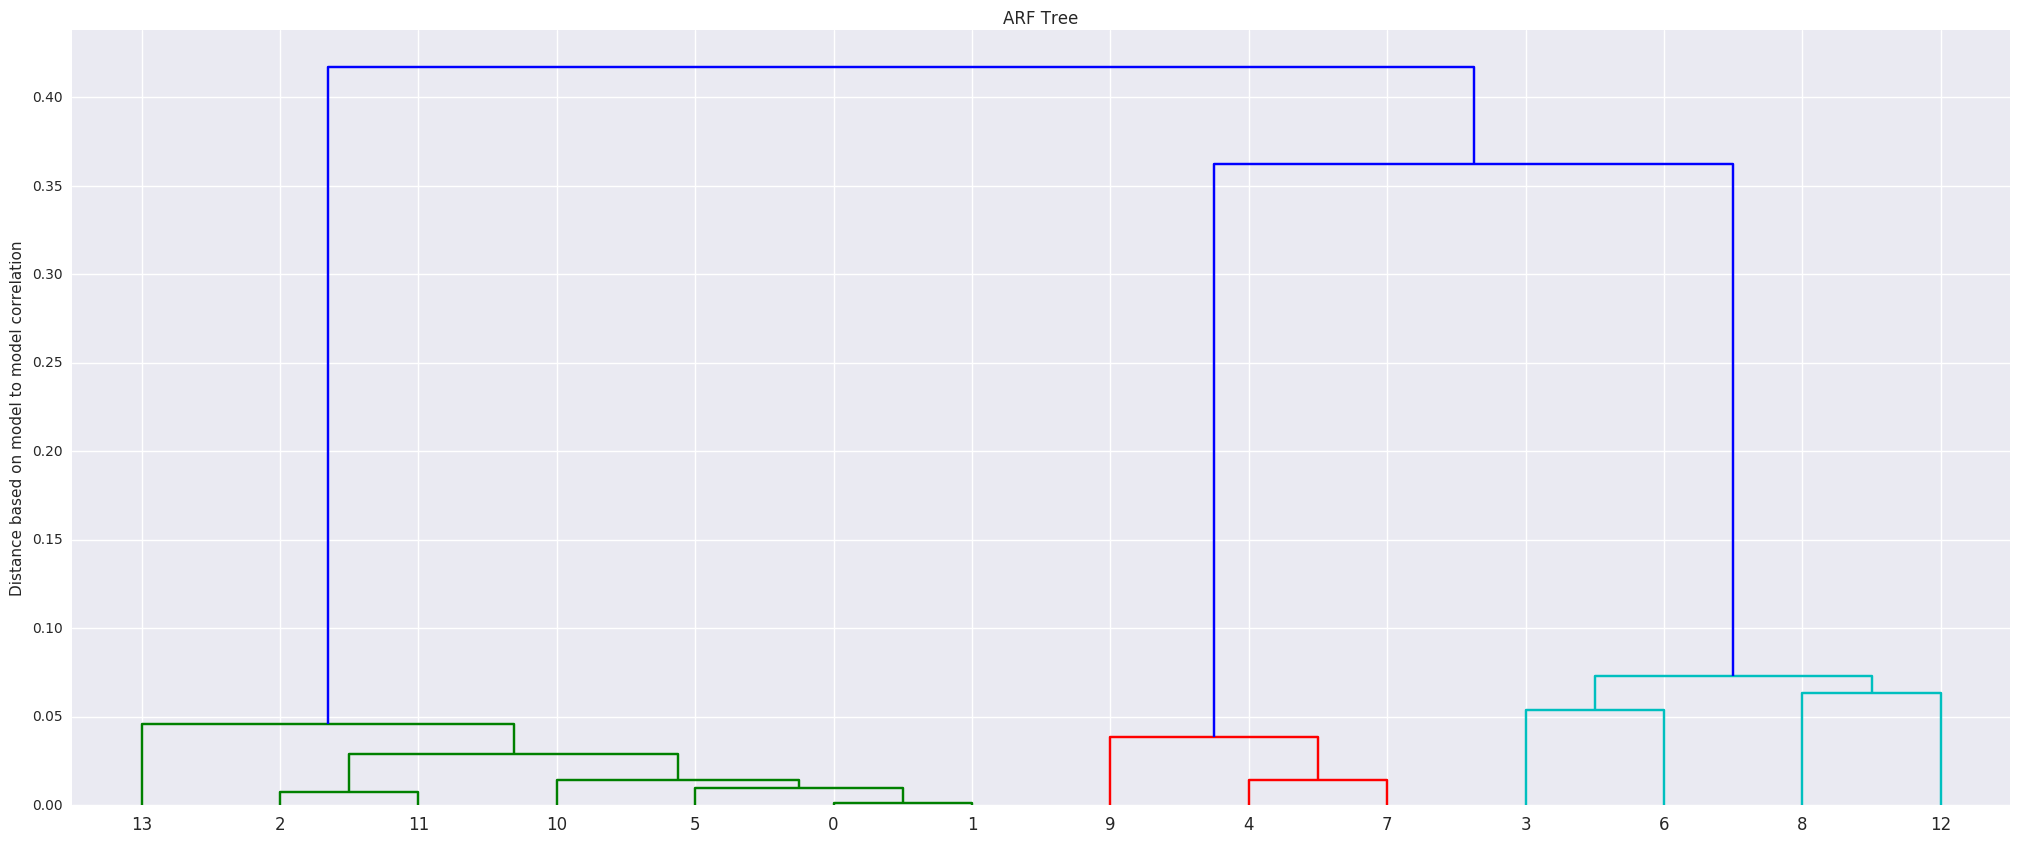

In [12]:
#Figuring out correlation coeffs between each of the Models
import scipy
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# List_of_ARFs =['ARF4','ARF10','ARF13','ARF16','ARF18','ARF27','ARF29','ARF34','ARF35','ARF39']
# List_of_ARFs =['ARF4','ARF7','ARF10','ARF13','ARF14','ARF16','ARF18','ARF24','ARF25','ARF27','ARF29','ARF34','ARF35','ARF36','ARF39']
# List_of_ARFs =['ARF4','ARF7','ARF10','ARF13','ARF14','ARF16','ARF18','ARF25','ARF27','ARF29','ARF34','ARF35','ARF36','ARF39']
List_of_ARFs =['ARF10','ARF13','ARF14','ARF25','ARF36','ARF39','ARF7','ARF16','ARF18','ARF27','ARF29','ARF34','ARF35','ARF4']

#finding correlations between how models predict data
# correlations = pandas.read_pickle('/mnt/Data_DapSeq_Maize/Correlations_170702.pkl')
# correlations_pivot = correlations.pivot('Model', 'Data', 'Percent variability explained by model')

#removing ARF24
correlations = pandas.read_pickle('/mnt/Data_DapSeq_Maize/Correlations_170702.pkl')
correlations = correlations[correlations['Model']!='ARF24 Model']
correlations = correlations[correlations['Data']!='ARF24 Data']
correlations_pivot = correlations.pivot('Model', 'Data', 'Percent variability explained by model')

#finding correlations between the models 
# correlations_between_models_across_data = pandas.DataFrame({'Model':[' ']*(len(List_of_ARFs)*len(List_of_ARFs)),'Model correlated to':[' ']*(len(List_of_ARFs)*len(List_of_ARFs)),'correlation':[0]*(len(List_of_ARFs)*len(List_of_ARFs))})
# counter1=0
# for Arf_label in List_of_ARFs:
#     counter2=0
#     for Arf_label_2 in List_of_ARFs:
#         correlations_between_models_across_data['Model'].iloc[(counter1*len(List_of_ARFs))+counter2] = Arf_label
#         correlations_between_models_across_data['Model correlated to'].iloc[(counter1*len(List_of_ARFs))+counter2] = Arf_label_2
#         correlations_between_models_across_data['correlation'].iloc[(counter1*len(List_of_ARFs))+counter2] = scipy.stats.pearsonr(correlations[correlations['Model']==(Arf_label+' Model')]['Percent variability explained by model'],correlations[correlations['Model']==(Arf_label_2+' Model')]['Percent variability explained by model'])[0]
#         counter2=counter2+1
#     counter1=counter1+1
# correlations_pivot = correlations_between_models_across_data.pivot('Model', 'Model correlated to', 'correlation')

# plot = seaborn.heatmap(correlations_pivot,cmap="RdBu_r", linewidths=.5)
# matplotlib.pyplot.savefig('/mnt/Data_DapSeq_Maize/Correlations_heat_map_170910.svg')

Z = linkage(correlations_pivot, 'single', 'correlation')

fig = plt.figure(figsize=(25, 10))
plt.title('ARF Tree')
plt.ylabel('Distance based on model to model correlation')
dendrogram(
    Z,
    leaf_font_size=12.,  # font size for the x axis labels
)
# plt.ylim(0,0.02)
# plt.yscale('linear')
# plt.savefig('/mnt/Data_DapSeq_Maize/ARF_Correlations_Tree_170910.svg')
# plt.savefig('/mnt/Data_DapSeq_Maize/ARF_Correlations_Tree_magnified_170910.svg')
plt.savefig('/mnt/Data_DapSeq_Maize/ARF_Correlations_Tree_171006.svg')

plt.show()


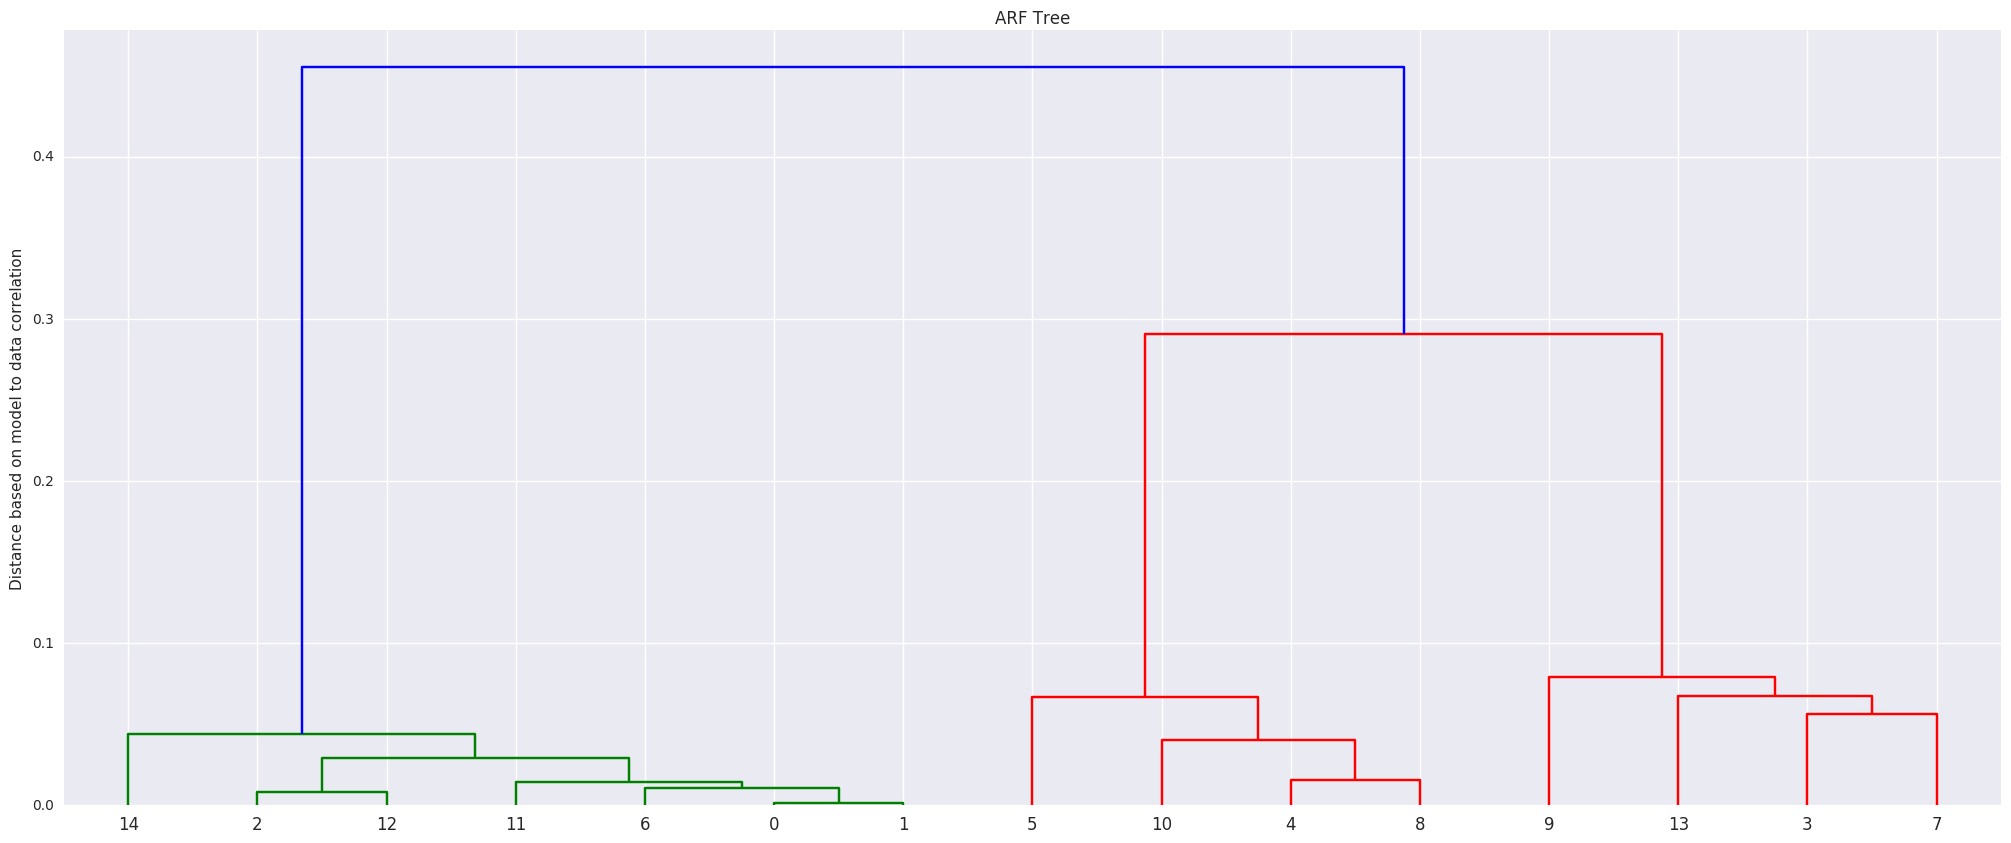

In [17]:
# Building a tree
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation


correlations = pandas.read_pickle('/mnt/Data_DapSeq_Maize/Correlations_170702.pkl')


correlations_pivot = correlations.pivot('Model', 'Data', 'Percent variability explained by model')

# Sample Number order = 'ARF10','ARF13','ARF14','ARF16','ARF18','ARF24','ARF25','ARF27','ARF29','ARF34','ARF35','ARF36','ARF39','ARF4','ARF7'
Z = linkage(correlations_pivot, 'single', 'correlation')

# fig,axx = plt.subplots()
ax = plt.figure(figsize=(25, 10))
plt.title('ARF Tree')
plt.ylabel('Distance based on model to data correlation')
dendrogram(
    Z,
    leaf_font_size=12.,  # font size for the x axis labels
)

# plt.xticks(['ARF7','ARF14','ARF39','ARF36','ARF25','ARF10','ARF13','ARF24','ARF35','ARF18','ARF29','ARF34','ARF4','ARF16','ARF27'])
# plt.savefig('/mnt/Data_DapSeq_Maize/ARF_Correlations_Tree_170910.svg')
plt.show()




## Looking at correlation between replicates

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


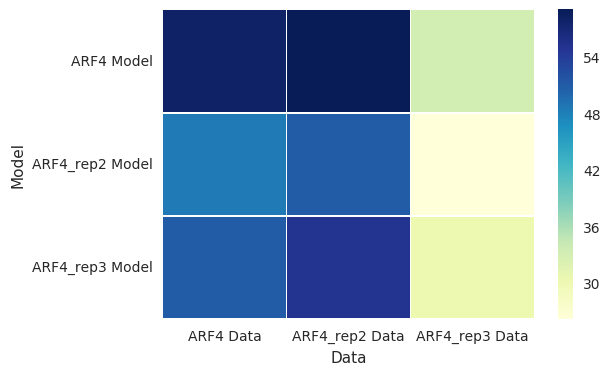

In [4]:
List_of_ARFs =['ARF4','ARF4_rep2','ARF4_rep3']
correlations = Model_cross_validation(List_of_ARFs)
correlations.to_pickle('/mnt/Data_DapSeq_Maize/Correlations_ARF4_replicates.pkl')
correlations_pivot = Plotting_heat_map_of_crossvalidation(correlations,'/mnt/Data_DapSeq_Maize/Correlations_ARF4_replicates_heat_map.svg')

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


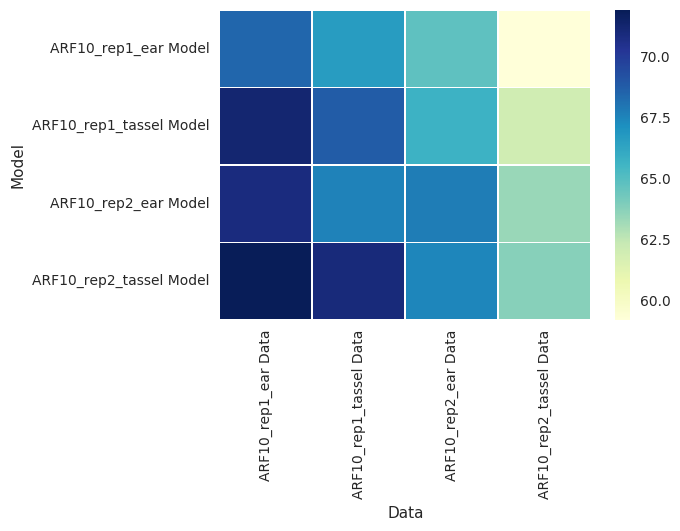

In [4]:
List_of_ARFs =['ARF10_rep1_ear','ARF10_rep2_ear','ARF10_rep1_tassel','ARF10_rep2_tassel']
correlations = Model_cross_validation(List_of_ARFs)
correlations.to_pickle('/mnt/Data_DapSeq_Maize/Correlations_ARF10_tissue_specific_replicates.pkl')
correlations_pivot = Plotting_heat_map_of_crossvalidation(correlations,'/mnt/Data_DapSeq_Maize/Correlations_ARF10_tissue_specific_replicates_heat_map.svg')

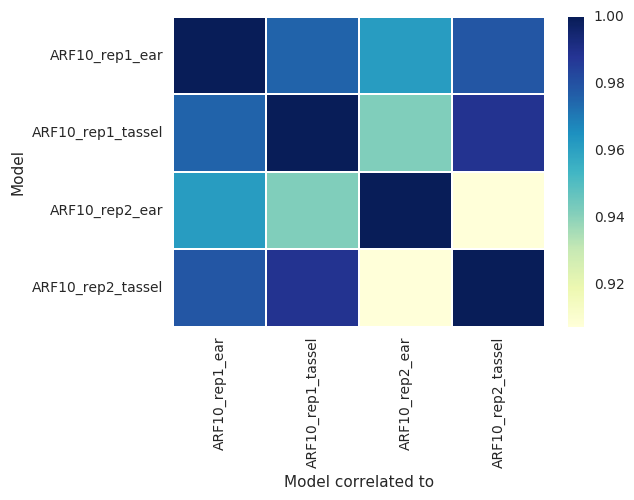

In [7]:
#Figuring out correlation coeffs between each of the Models
import scipy
List_of_ARFs =['ARF10_rep1_ear','ARF10_rep2_ear','ARF10_rep1_tassel','ARF10_rep2_tassel']
correlations = pandas.read_pickle('/mnt/Data_DapSeq_Maize/Correlations_ARF10_tissue_specific_replicates.pkl')

correlations_between_models_across_data = pandas.DataFrame({'Model':[' ']*(len(List_of_ARFs)*len(List_of_ARFs)),'Model correlated to':[' ']*(len(List_of_ARFs)*len(List_of_ARFs)),'correlation':[0]*(len(List_of_ARFs)*len(List_of_ARFs))})

counter1=0
for Arf_label in List_of_ARFs:
    counter2=0
    for Arf_label_2 in List_of_ARFs:
        correlations_between_models_across_data['Model'].iloc[(counter1*len(List_of_ARFs))+counter2] = Arf_label
        correlations_between_models_across_data['Model correlated to'].iloc[(counter1*len(List_of_ARFs))+counter2] = Arf_label_2
        correlations_between_models_across_data['correlation'].iloc[(counter1*len(List_of_ARFs))+counter2] = scipy.stats.pearsonr(correlations[correlations['Model']==(Arf_label+' Model')]['Percent variability explained by model'],correlations[correlations['Model']==(Arf_label_2+' Model')]['Percent variability explained by model'])[0]
        counter2=counter2+1
    counter1=counter1+1

correlations_pivot = correlations_between_models_across_data.pivot('Model', 'Model correlated to', 'correlation')

plot = seaborn.heatmap(correlations_pivot,cmap="YlGnBu", linewidths=.5)
matplotlib.pyplot.savefig('/mnt/Data_DapSeq_Maize/Correlation_between_models_of_ARF10_tissue_specific_replicates_heat_map.svg')

# Doing cross validation with equally sized train sets

In [1]:
def Model_cross_validation_equal_train(List_of_ARFs):
    
    import scipy
    import keras
    import numpy as np
    import pandas as pd
    from keras import backend
    backend._BACKEND="theano"
    
    models = [None]*len(List_of_ARFs)
    seq_test_sets = [None]*len(List_of_ARFs)
    res_test_sets = [None]*len(List_of_ARFs)
    model_labels = [' ']*len(List_of_ARFs)
    test_set_labels = [' ']*len(List_of_ARFs)
    correlations = pd.DataFrame({'Percent variability explained by model':[0]*(len(List_of_ARFs)**2),'Model':[' ']*(len(List_of_ARFs)**2),'Data':[' ']*(len(List_of_ARFs)**2)})

    counter1=0
    
    for x in List_of_ARFs:
        models[counter1] = keras.models.load_model('/mnt/Data_DapSeq_Maize/TrainedModel_DanQ_' +x+'.h5')
        seq_test_sets[counter1]=np.load('/mnt/Data_DapSeq_Maize/'+x+'no_negative_seq_test.npy')
        seq_test_sets[counter1]=seq_test_sets[counter1][0:1490] #1490 is the size of the smallest test set
        res_test_sets[counter1]=np.load('/mnt/Data_DapSeq_Maize/'+x+'no_negative_res_test.npy')
        res_test_sets[counter1]=res_test_sets[counter1][0:1490]
        model_labels[counter1] = x+' Model'
        test_set_labels[counter1] = x+' Data'
        counter1=counter1+1
    
    counter2 = 0
    for counter2 in range(len(List_of_ARFs)):
        model = models[counter2]
        counter3=0
        for counter3 in range(len(List_of_ARFs)):
            temp = scipy.stats.pearsonr(res_test_sets[counter3],model.predict(seq_test_sets[counter3]).flatten())
            correlations['Percent variability explained by model'].iloc[(counter2*len(List_of_ARFs))+counter3] = (temp[0]**2)*100
            correlations['Model'].iloc[(counter2*len(List_of_ARFs))+counter3] = model_labels[counter2]
            correlations['Data'].iloc[(counter2*len(List_of_ARFs))+counter3] = test_set_labels[counter3]
            counter3 = counter3+1
        counter2 = counter2+1
    
    return correlations

In [2]:
def Plotting_heat_map_of_crossvalidation(correlations):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn
    %matplotlib inline
    correlations_pivot = correlations.pivot('Model', 'Data', 'Percent variability explained by model')
    plot = seaborn.heatmap(correlations_pivot,cmap="YlGnBu", linewidths=.5)
#     plt.savefig(save_fig_path)
    return correlations_pivot

In [5]:
List_of_ARFs =['ARF4','ARF10','ARF13','ARF16','ARF18','ARF27','ARF29','ARF34','ARF35','ARF39']
correlations = Model_cross_validation_equal_train(List_of_ARFs)



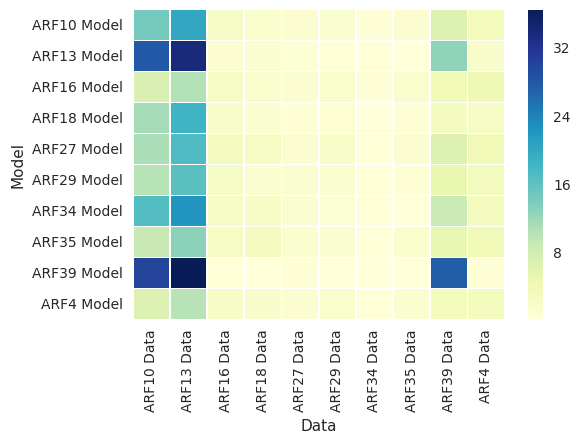

In [8]:
correlations_pivot = Plotting_heat_map_of_crossvalidation(correlations)

In [10]:
#Figuring out correlation coeffs between each of the Models
import scipy
import pandas

correlations_between_models_across_data = pandas.DataFrame({'Model':[' ']*(len(List_of_ARFs)*len(List_of_ARFs)),'Model correlated to':[' ']*(len(List_of_ARFs)*len(List_of_ARFs)),'correlation':[0]*(len(List_of_ARFs)*len(List_of_ARFs))})

counter1=0
for Arf_label in List_of_ARFs:
    counter2=0
    for Arf_label_2 in List_of_ARFs:
        correlations_between_models_across_data['Model'].iloc[(counter1*len(List_of_ARFs))+counter2] = Arf_label
        correlations_between_models_across_data['Model correlated to'].iloc[(counter1*len(List_of_ARFs))+counter2] = Arf_label_2
        correlations_between_models_across_data['correlation'].iloc[(counter1*len(List_of_ARFs))+counter2] = scipy.stats.pearsonr(correlations[correlations['Model']==(Arf_label+' Model')]['Percent variability explained by model'],correlations[correlations['Model']==(Arf_label_2+' Model')]['Percent variability explained by model'])[0]
        counter2=counter2+1
    counter1=counter1+1

correlations_pivot = correlations_between_models_across_data.pivot('Model', 'Model correlated to', 'correlation')


In [13]:
correlations_pivot

Data,ARF10 Data,ARF13 Data,ARF16 Data,ARF18 Data,ARF27 Data,ARF29 Data,ARF34 Data,ARF35 Data,ARF39 Data,ARF4 Data
Model,,,,,,,,,,
ARF10 Model,14.614518,20.130854,2.497978,1.896048,1.246423,1.355480,0.693664,1.301991,6.866234,3.543114
ARF13 Model,28.234032,34.083993,1.312853,1.431577,0.913665,0.497857,0.490982,0.307903,12.927129,1.933808
ARF16 Model,7.137409,10.616481,2.570200,1.804760,1.307749,1.659464,0.673523,1.696765,4.048094,4.200453
ARF18 Model,11.583267,18.651432,1.940974,1.353222,0.812982,1.149163,0.474539,0.789442,2.998965,2.274828
ARF27 Model,11.081906,17.340905,2.968916,2.791029,1.253414,2.110261,0.591826,1.276985,6.705720,3.930289
ARF29 Model,10.427479,16.434820,2.699540,1.446422,1.421085,1.499624,0.619309,0.776858,5.248019,3.398369
ARF34 Model,17.027889,22.342552,2.682426,2.260943,1.428126,0.962078,0.513305,0.412186,9.103156,3.432296
ARF35 Model,9.177037,13.101862,2.850348,3.070829,1.545777,1.387812,0.540307,1.880401,5.583441,3.977101
ARF39 Model,30.315934,36.639052,0.489767,0.206235,0.702620,0.199719,0.335519,0.340363,27.569080,0.732094


In [11]:
import seaborn
plot = seaborn.heatmap(correlations_pivot,cmap="YlGnBu", linewidths=.5)

RuntimeError: Could not create write struct

In [12]:
# Building a tree
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation


correlations_pivot = correlations.pivot('Model', 'Data', 'Percent variability explained by model')

# Sample Number order = 'ARF10','ARF13','ARF16','ARF18','ARF27','ARF29','ARF34','ARF35','ARF39','ARF4'
Z = linkage(correlations_pivot, 'single', 'correlation')


ax = plt.figure(figsize=(25, 10))
plt.title('ARF Tree')
plt.ylabel('Distance based on model correlation')
dendrogram(
    Z,
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()


RuntimeError: Could not create write struct